# Multiple Linear Regression


> ### $\hat y = a + b_1*X_1+ b_2*X_2+...++ b_n*X_n$
$ b_1, b_2 , ... b_n$ = coefficient

a = intercept

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

# working on a car dataset which contains

In [2]:
sns.set(color_codes=True)

In [4]:
cars = pd.read_excel('../dataset/MTcars.xlsx',sheet_name='Sheet1')
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [11]:
cars_m = cars.iloc[:,1:]
cars_m.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [12]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
model    32 non-null object
mpg      32 non-null float64
cyl      32 non-null int64
disp     32 non-null float64
hp       32 non-null int64
drat     32 non-null float64
wt       32 non-null float64
qsec     32 non-null float64
vs       32 non-null int64
am       32 non-null int64
gear     32 non-null int64
carb     32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


### Discriptive Stats

In [15]:
r= cars_m.corr()

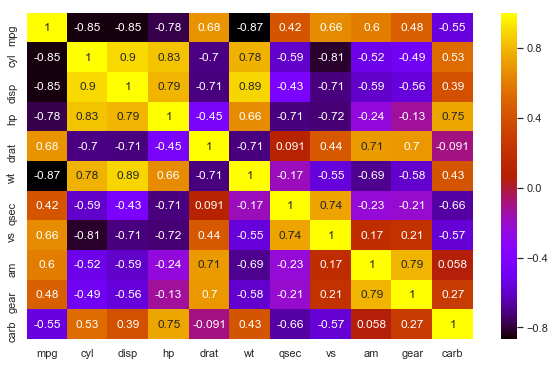

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(data=r,annot=True,cmap='gnuplot')
plt.show()

In [23]:
cars_m.keys()

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

C:\Users\srikanth\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\srikanth\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\srikanth\Anaconda\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\Users\srikanth\Anaconda\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\srikanth\Anaconda\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\srikanth\Anaconda\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in 

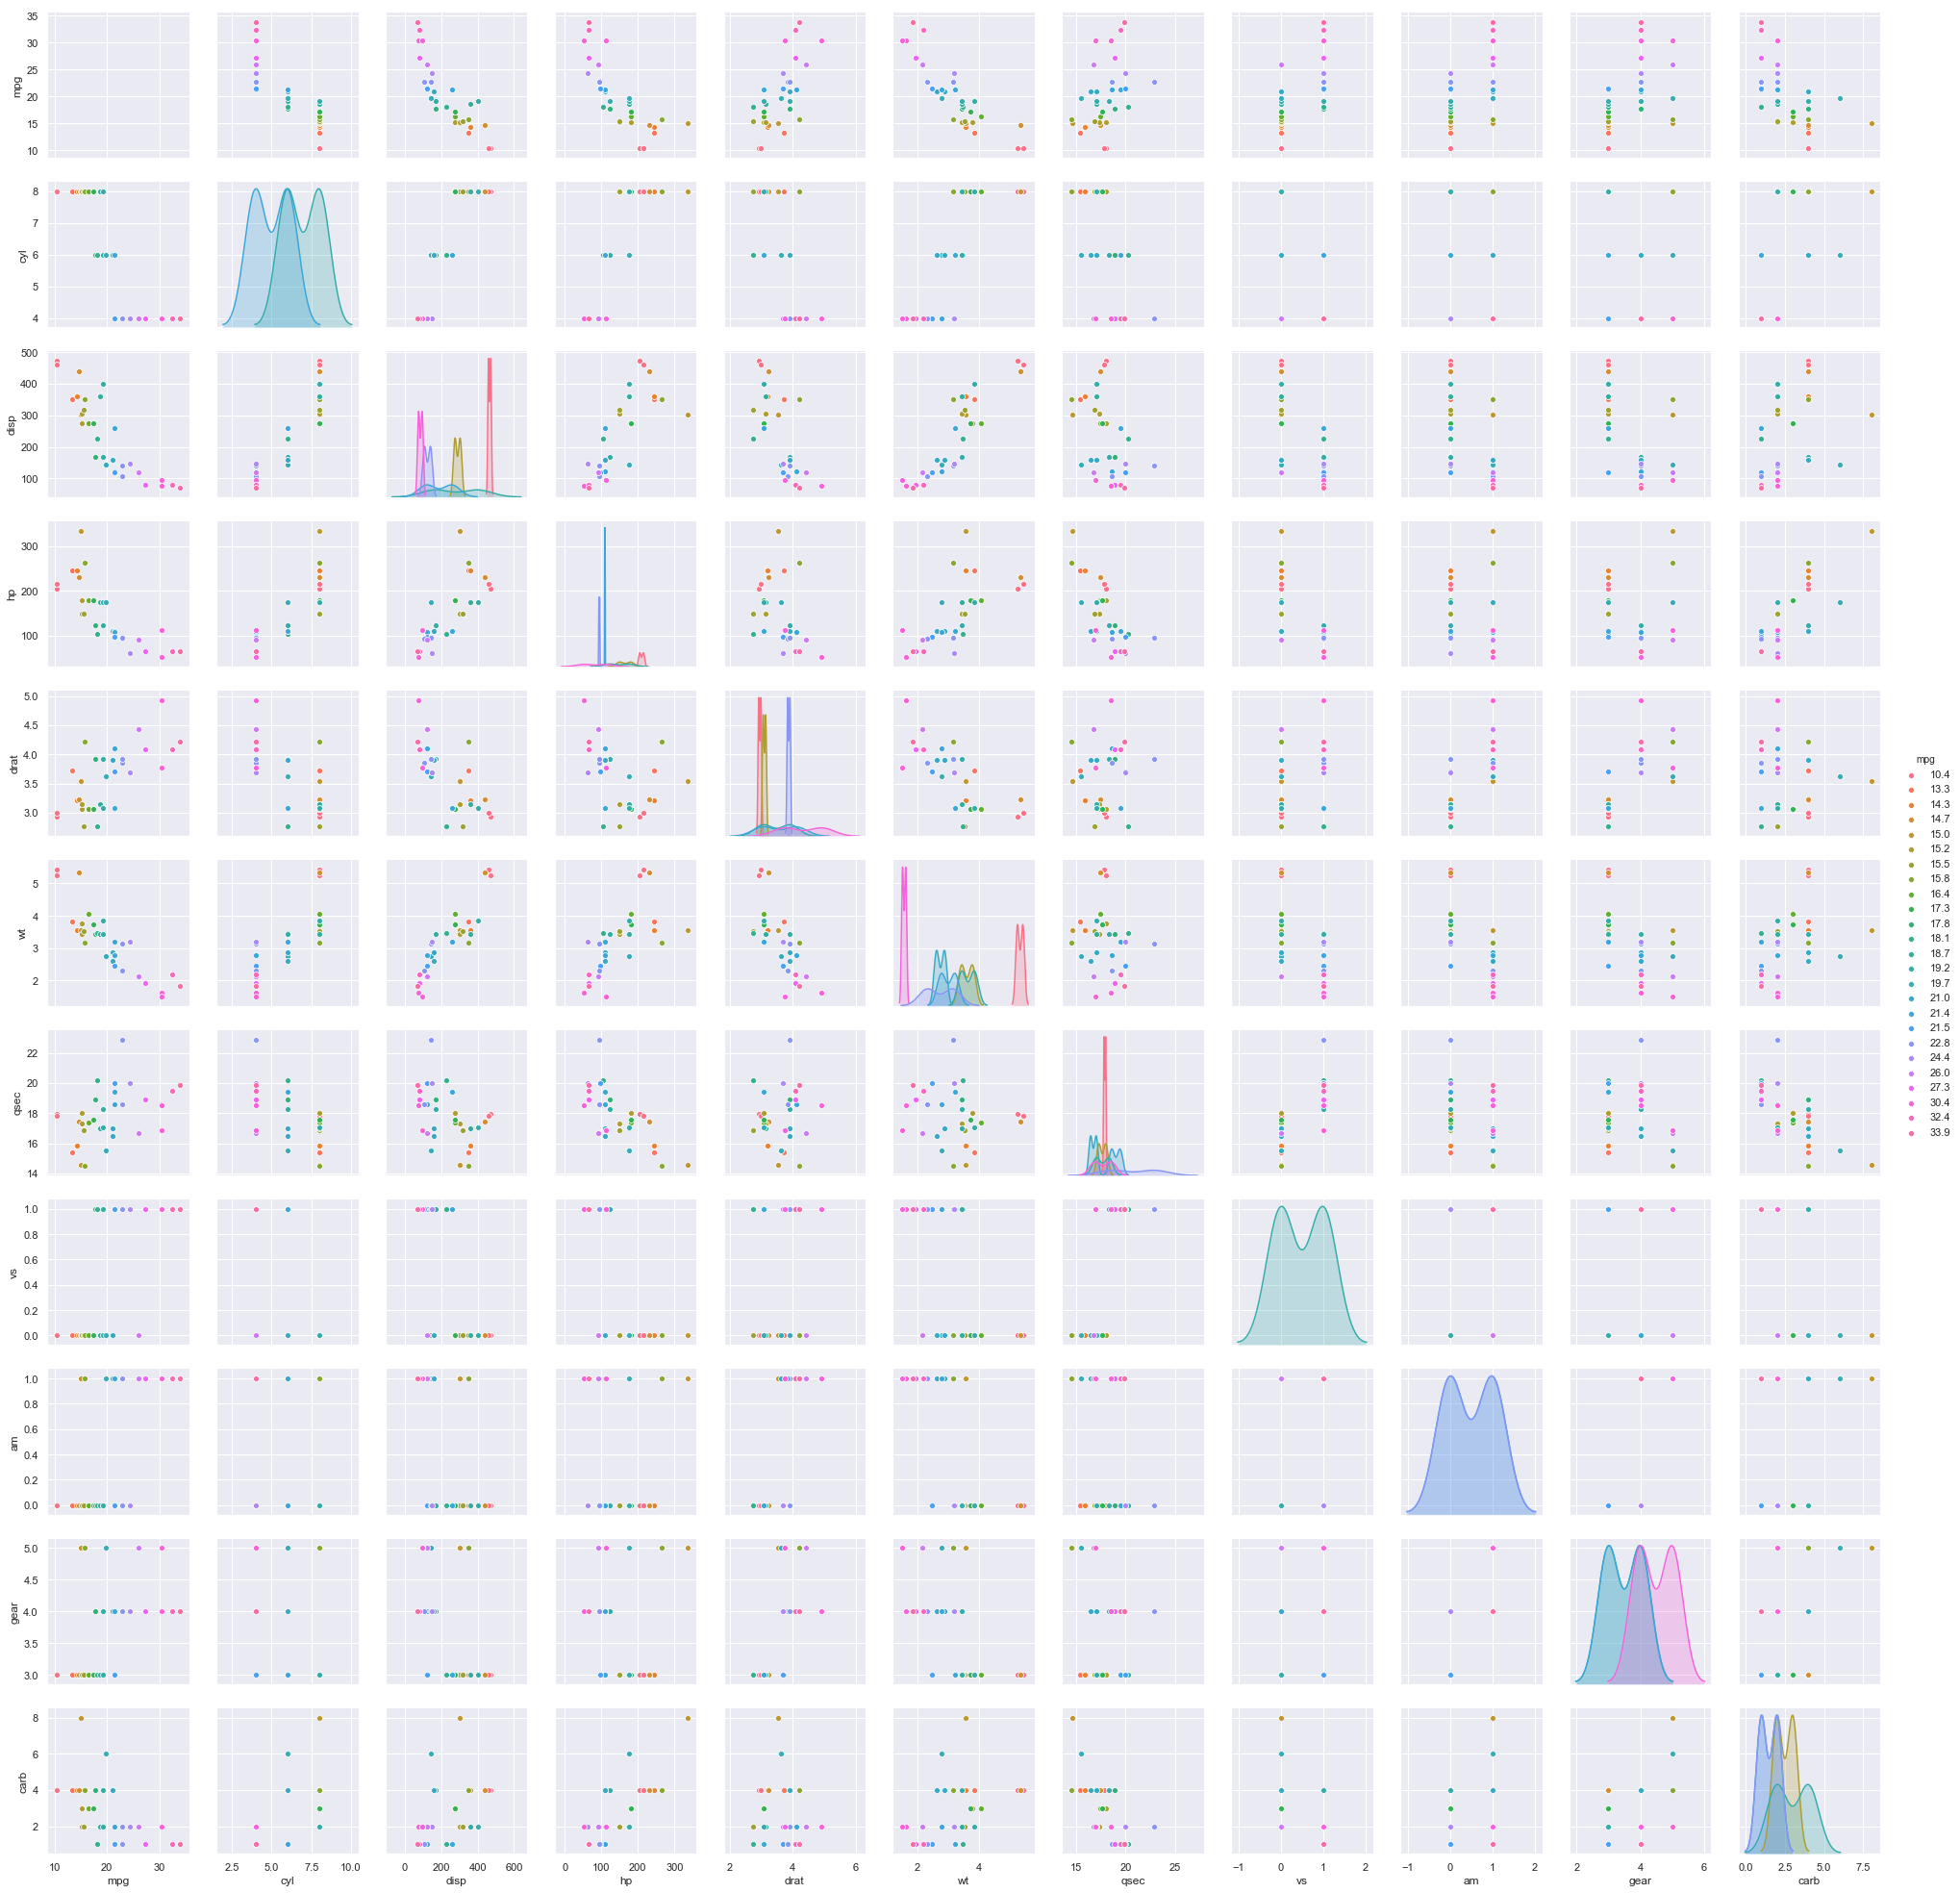

In [27]:
sns.pairplot(cars_m,hue='mpg',diag_kind='kde')
plt.show()

In [28]:
import statsmodels.formula.api as smf

In [31]:
cars_m.keys()

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [32]:
model = smf.ols(formula="mpg~cyl+disp+hp+drat+wt+qsec+vs+am+gear+carb",data=cars_m)
results = model.fit()

In [33]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Fri, 14 Dec 2018   Prob (F-statistic):           3.79e-07
Time:                        11:21:12   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3034     18.718      0.657      0.5

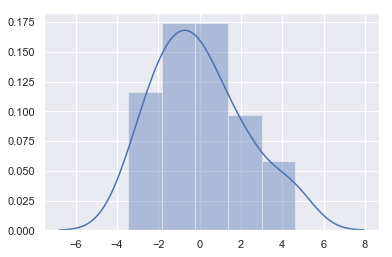

In [35]:
sns.distplot(results.resid)

# Covariance

In [19]:
cars.cov()

,Big Mac Price in USD,Hourly Wages in USD
Big Mac Price in USD,0.714815,3.390746
Hourly Wages in USD,3.390746,24.310415


>### Correlation coefficient (*r* )

In [20]:
cars.corr()

,Big Mac Price in USD,Hourly Wages in USD
Big Mac Price in USD,1.000000,0.813396
Hourly Wages in USD,0.813396,1.000000


In [21]:
results.params

Intercept     -4.539689
BigMacPrice    4.743527
dtype: float64

In [22]:
results.rsquared

0.6616133883877515

In [23]:
import statsmodels.api as sm

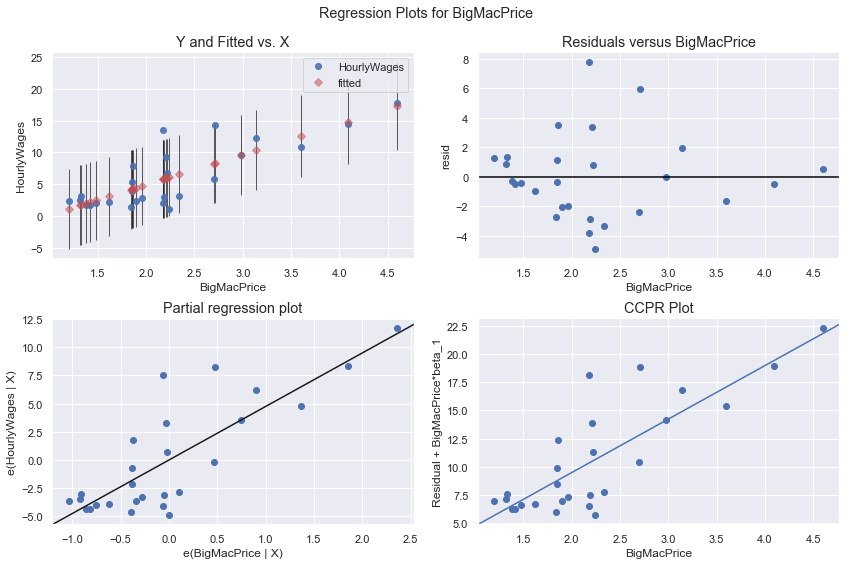

In [24]:
fig = plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(results,'BigMacPrice',fig=fig)

In [25]:
# 3 USD
hourlywages = -4.53+4.74*3
print('Hourly wages in USD =',hourlywages)

Hourly wages in USD = 9.690000000000001


In [26]:
data.keys()

Index(['Country', 'BigMacPrice', 'HourlyWages'], dtype='object')

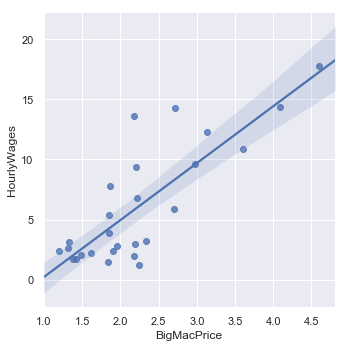

In [27]:
sns.lmplot('BigMacPrice','HourlyWages',data=data)

In [29]:
res = results.resid

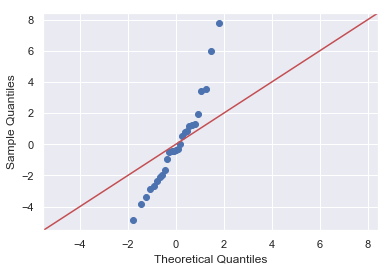

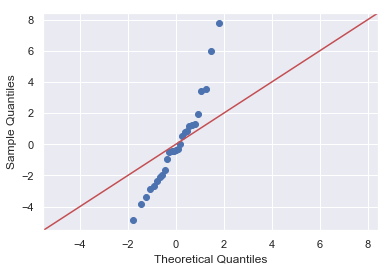

In [38]:
sm.graphics.qqplot(res,line='45')